# **Class Notes**
## Samsung Innovation Campus
### Artificial Intelligece Module

**Nombre:** Alan Palma

### **Machine Learning: Supervised Learning - Regression Example**


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science'])

In [4]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url, sep=',', index_col=0)

print("Ver dataset:")
display(df.head())

print("Información general del dataset:")
print(df.info())

Ver dataset:


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


In [5]:
# Clean data (if necessary)
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [8]:
# División de datos y selección de características
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (160, 3)
Tamaño del conjunto de prueba: (40, 3)


In [9]:
# Estandarización de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

print("Coeficientes del modelo:")
print(model.coef_)

print("Primeras 5 predicciones vs valores reales:")
for i in range(5):
    print(f"Predicción: {y_pred[i]}, Real: {y_test.iloc[i]}")

Coeficientes del modelo:
[3.76419618 2.79230665 0.05597551]
Primeras 5 predicciones vs valores reales:
Predicción: 16.40802420322863, Real: 16.9
Predicción: 20.88988208714789, Real: 22.4
Predicción: 21.55384317908956, Real: 21.4
Predicción: 10.608502561984903, Real: 7.3
Predicción: 22.112373259857662, Real: 24.7


In [12]:
# Evaliuar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Métricas del modelo:")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R^2: {r2}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

Métricas del modelo:
Error cuadrático medio (MSE): 3.174097353976106
R^2: 0.8994380241009119
Raíz del error cuadrático medio (RMSE): 1.7815996615334506


In [13]:
# Calcular residuos
residuals = y_test - y_pred

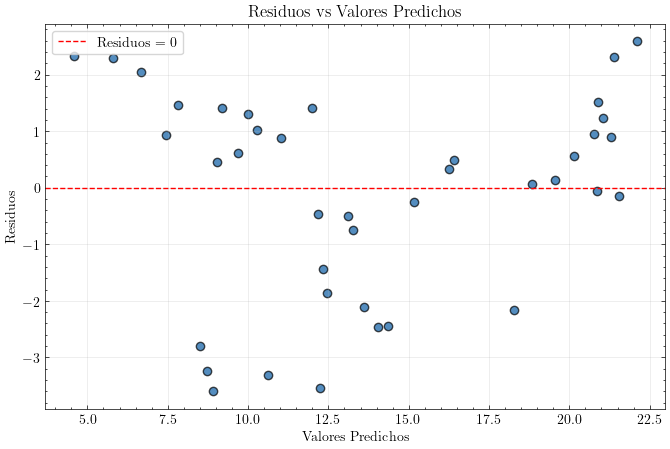

In [14]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--', label='Residuos = 0')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)
plt.show()

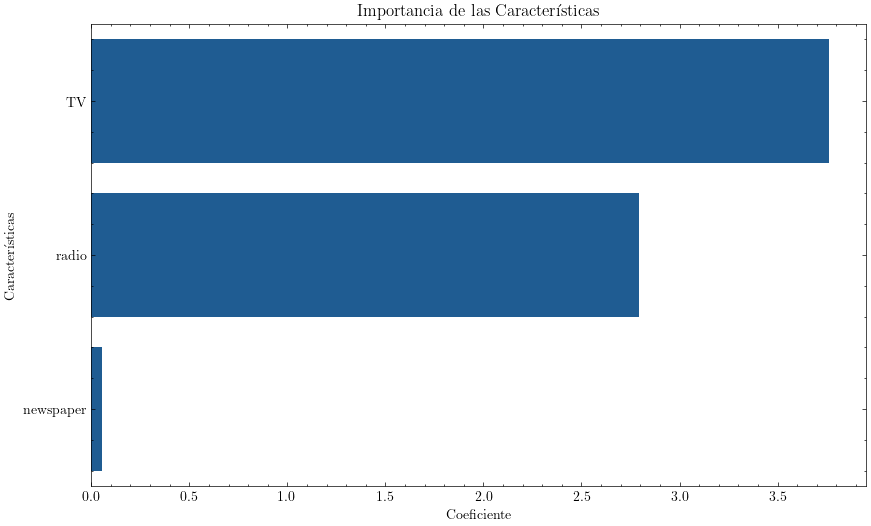

In [19]:
import seaborn as sns

# Interpretación de coeficientes
feature_names = X.columns
coefficients = model.coef_

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Importancia de las Características')
plt.xlabel('Coeficiente')
plt.ylabel('Características')
plt.show()

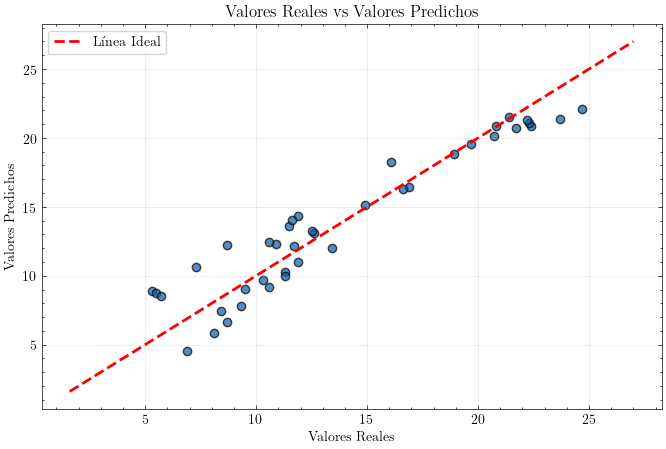

In [ ]:
# Plot del modelo de regresión lineal
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
# Agregar la línea ideal
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Línea Ideal')
plt.title('Valores Reales vs Valores Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend(frameon=True)
plt.grid(True, alpha=0.3)
plt.show()